<a href="https://colab.research.google.com/github/VineetSivadasan/ONS_CAMDEN_CRIME_STATISTICS/blob/main/ONS_crime_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import all three datasets and turn them into pandas dataframes 
df_crime = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/df_crime_cleaned.csv')
df_ward_atlas = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-atlas-data.csv', encoding= 'unicode_escape')  #non-ascii characters in the csv that can not be encoded/decoded hence must use unicode escape
df_ward_profile = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-profiles-excel-version.csv', encoding= 'unicode_escape')

In [ ]:
df_crime.shape

(285107, 22)

In [ ]:
df_ward_atlas.shape

(629, 946)

In [ ]:
df_ward_profile.shape

(660, 67)

In [ ]:
df_ward_profile.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 67 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Ward name                                                                    660 non-null    object 
 1   Old code                                                                     660 non-null    object 
 2   New code                                                                     660 non-null    object 
 3   Population - 2015                                                            660 non-null    float64
 4   Children aged 0-15 - 2015                                                    660 non-null    float64
 5   Working-age (16-64) - 2015                                                   660 non-null    float64
 6   Older people aged 65+ - 2015              

In [ ]:
# actual number of 'All children aged 0-15 - 2015' given in a column hence percentage not needed
df_ward_profile.drop(['% All Children aged 0-15 - 2015'], axis=1, inplace=True)

In [ ]:
# actual number of 'All children aged 16-64 - 2015' given in a column hence percentage not needed
df_ward_profile.drop(['% All Working-age (16-64) - 2015'], axis=1, inplace=True)

In [ ]:
# actual number of 'All children aged 65+ - 2015' given in a column hence percentage not needed
df_ward_profile.drop(['% All Older people aged 65+ - 2015'], axis=1, inplace=True)

In [ ]:
# Obesity in reception year children is unlikely to be an important predictor for forecasting crime stats 
df_ward_profile.drop(['% children in reception year who are obese - 2011/12 to 2013/14'], axis=1, inplace=True) 

In [ ]:
# Obesity in year 6 children is unlikely to be an important predictor for forecasting crime stats 
df_ward_profile.drop(['% children in year 6 who are obese- 2011/12 to 2013/14'], axis=1, inplace=True)

In [ ]:
#extract the 18 wards from the London borough of Camden from df_ward_profile dataframe
df_profile_camden = df_ward_profile[df_ward_profile['Ward name'].str.match('Cam')]
df_profile_justcamden = df_profile_camden[df_profile_camden['New code'] == 'E09000007'] #total camden stats in one row
df_profile_camden = df_profile_camden[df_profile_camden['New code'] != 'E09000007']

In [ ]:
df_profile_camden.to_csv('df_profile_camden.csv', index=False)

In [ ]:
df_profile_camden.drop(['New code'], axis=1, inplace=True)

In [ ]:
df_profile_camden.drop(['Old code'], axis=1, inplace=True)

In [ ]:
#check to see if there are any NaN values in the Camden profile dataset
df_profile_camden.isnull().values.any()

False

In [ ]:
df_profile_camden.describe

<bound method NDFrame.describe of                                    Ward name  ...  Turnout at Mayoral election - 2012
103                         Camden - Belsize  ...                                36.2
104                      Camden - Bloomsbury  ...                                33.2
105  Camden - Camden Town with Primrose Hill  ...                                41.6
106                      Camden - Cantelowes  ...                                37.3
107                   Camden - Fortune Green  ...                                37.8
108           Camden - Frognal and Fitzjohns  ...                                34.4
109                      Camden - Gospel Oak  ...                                40.3
110                  Camden - Hampstead Town  ...                                40.8
111                      Camden - Haverstock  ...                                38.3
112                        Camden - Highgate  ...                                46.0
113       Camden - H

In [ ]:
corr_profile = df_profile_camden.corr()
corr_profile.style.background_gradient(cmap='coolwarm')

,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,Mean Age - 2013,Median Age - 2013,Area - Square Kilometres,Population density (persons per sq km) - 2013,% BAME - 2011,% Not Born in UK - 2011,% English is First Language of no one in household - 2011,General Fertility Rate - 2013,Male life expectancy -2009-13,Female life expectancy -2009-13,"Rate of All Ambulance Incidents per 1,000 population - 2014",Rates of ambulance call outs for alcohol related illness - 2014,Number Killed or Seriously Injured on the roads - 2014,In employment (16-64) - 2011,Employment rate (16-64) - 2011,Number of jobs in area - 2013,Employment per head of resident WA population - 2013,Rate of new registrations of migrant workers - 2011/12,Median House Price (£) - 2014,Number of properties sold - 2014,Median Household income estimate (2012/13),Number of Household spaces - 2011,% detached houses - 2011,% semi-detached houses - 2011,% terraced houses - 2011,"% Flat, maisonette or apartment - 2011",% Households Owned - 2011,% Households Social Rented - 2011,% Households Private Rented - 2011,% dwellings in council tax bands A or B - 2015,"% dwellings in council tax bands C, D or E - 2015","% dwellings in council tax bands F, G or H - 2015",Claimant rate of key out-of-work benefits (working age client group) (2014),Claimant Rate of Housing Benefit (2015),Claimant Rate of Employment Support Allowance - 2014


#Let's check for multicollinearity between features

In [ ]:
#drop the ward name and create a separate Camden profiles dataframe in order to run VIF and test for multicollinearity
df_profile_camden_vif = df_profile_camden.drop(['Ward name'], axis=1)

In [ ]:
df_profile_camden.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 103 to 120
Data columns (total 60 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Ward name                                                                    18 non-null     object 
 1   Population - 2015                                                            18 non-null     float64
 2   Children aged 0-15 - 2015                                                    18 non-null     float64
 3   Working-age (16-64) - 2015                                                   18 non-null     float64
 4   Older people aged 65+ - 2015                                                 18 non-null     float64
 5   Mean Age - 2013                                                              18 non-null     float64
 6   Median Age - 2013                        

In [ ]:
df_profile_camden_vif1 = df_profile_camden[['Children aged 0-15 - 2015',	'Working-age (16-64) - 2015',	'Older people aged 65+ - 2015',	
                                            'Mean Age - 2013',	'Median Age - 2013',	'Area - Square Kilometres',	
                                            'Population density (persons per sq km) - 2013',	'% BAME - 2011',	'% Not Born in UK - 2011',	
                                            '% English is First Language of no one in household - 2011',	'General Fertility Rate - 2013',
                                            'Male life expectancy -2009-13',	'Rate of All Ambulance Incidents per 1,000 population - 2014',	
                                            'Rates of ambulance call outs for alcohol related illness - 2014',	'Number Killed or Seriously Injured on the roads - 2014',	
                                            'In employment (16-64) - 2011',	'Number of jobs in area - 2013', '% Flat, maisonette or apartment - 2011',]]	


In [ ]:
df_profile_camden_vif2 = df_profile_camden[['Employment per head of resident WA population - 2013', 'Rate of new registrations of migrant workers - 2011/12', 
                                            'Median House Price (£) - 2014', 'Number of properties sold - 2014', 'Median Household income estimate (2012/13)', 
                                            'Number of Household spaces - 2011', '% detached houses - 2011', '% semi-detached houses - 2011', 
                                            '% terraced houses - 2011', '% Households Owned - 2011',	'% Households Social Rented - 2011',	'% Households Private Rented - 2011',	
                                            '% dwellings in council tax bands A or B - 2015',	'% dwellings in council tax bands C, D or E - 2015',
                                            '% dwellings in council tax bands F, G or H - 2015',	'Claimant rate of key out-of-work benefits (working age client group) (2014)',
                                            'Claimant Rate of Housing Benefit (2015)']]

In [ ]:
df_profile_camden_vif3 = df_profile_camden[['Claimant Rate of Employment Support Allowance - 2014',	'Rate of JobSeekers Allowance (JSA) Claimants - 2015', 
                                            '% dependent children (0-18) in out-of-work households - 2014',	'% of households with no adults in employment with dependent children - 2011',	
                                            '% of lone parents not in employment - 2011',	'(ID2010) - Rank of average score (within London) - 2010',	'(ID2010) % of LSOAs in worst 50% nationally - 2010',
                                            'Average GCSE capped point scores - 2014',	'Unauthorised Absence in All Schools (%) - 2013',	'% with no qualifications - 2011',	'% with Level 4 qualifications and above - 2011',
                                            'A-Level Average Point Score Per Student - 2013/14',	'A-Level Average Point Score Per Entry; 2013/14',	'Crime rate - 2014/15',	'Violence against the person rate - 2014/15',	
                                            'Deliberate Fires per 1,000 population - 2014',	'% area that is open space - 2014',	'Cars per household - 2011']]

In [ ]:
df_profile_camden_vif4 = df_profile_camden[['Population - 2015','Employment per head of resident WA population - 2013', 'Rate of new registrations of migrant workers - 2011/12', 'Median House Price (£) - 2014', 
                                            'Number of properties sold - 2014', 'Median Household income estimate (2012/13)', 'Number of Household spaces - 2011', 
                                            '% detached houses - 2011', '% semi-detached houses - 2011', '% terraced houses - 2011',
                                            'Average Public Transport Accessibility score - 2014', '% travel by bicycle to work - 2011', 'Turnout at Mayoral election - 2012']]

In [ ]:
#check for multi-collinearity with VIF (Variance Inflation Method):

$ VIF = \frac{{1}}{(1-R^2)} $

$ R^2 = \frac{TSS-RSS}{TSS} = \frac{\sum_{i=1}^{N}(y_i - \overline{y})^2-\sum_{i=1}^N(y_i - \hat{y}{_i})^2}{\sum_{i=1}^N(y_i - \overline{y})^2} $

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# checking the ward-profiles-excel-version.csv for multicollinearity between features
vif_data1 = pd.DataFrame()
vif_data1["feature"] = df_profile_camden_vif1.columns
vif_data1["VIF"] = [variance_inflation_factor(df_profile_camden_vif1.values, i) for i in range(len(df_profile_camden_vif1.columns))]

In [ ]:
df_profile_camden_vif1.columns.shape

(18,)

In [ ]:
# checking the ward-profiles-excel-version.csv for multicollinearity between features
vif_data2 = pd.DataFrame()
vif_data2["feature"] = df_profile_camden_vif2.columns
vif_data2["VIF"] = [variance_inflation_factor(df_profile_camden_vif2.values, i) for i in range(len(df_profile_camden_vif2.columns))]

In [ ]:
df_profile_camden_vif2.columns.shape

(17,)

In [ ]:
# checking the ward-profiles-excel-version.csv for multicollinearity between features
vif_data3 = pd.DataFrame()
vif_data3["feature"] = df_profile_camden_vif3.columns
vif_data3["VIF"] = [variance_inflation_factor(df_profile_camden_vif3.values, i) for i in range(len(df_profile_camden_vif3.columns))]

In [ ]:
df_profile_camden_vif3.columns.shape

(18,)

In [ ]:
# checking the ward-profiles-excel-version.csv for multicollinearity between features
vif_data4 = pd.DataFrame()
vif_data4["feature"] = df_profile_camden_vif4.columns
vif_data4["VIF"] = [variance_inflation_factor(df_profile_camden_vif4.values, i) for i in range(len(df_profile_camden_vif4.columns))]

In [ ]:
df_profile_camden_vif4.columns.shape

(13,)

In [ ]:
print(vif_data1)

                                              feature            VIF
0                           Children aged 0-15 - 2015   33366.360641
1                          Working-age (16-64) - 2015   17207.651341
2                        Older people aged 65+ - 2015   34977.338181
3                                     Mean Age - 2013  293499.060999
4                                   Median Age - 2013  533309.801785
5                            Area - Square Kilometres    3386.876280
6       Population density (persons per sq km) - 2013    1239.849853
7                                       % BAME - 2011    5956.206581
8                             % Not Born in UK - 2011  106612.204063
9   % English is First Language of no one in house...    8568.613902
10                      General Fertility Rate - 2013   19438.218846
11                      Male life expectancy -2009-13   26365.500308
12  Rate of All Ambulance Incidents per 1,000 popu...    3849.434652
13  Rates of ambulance call outs f

In [ ]:
print(vif_data2)

                                              feature           VIF
0   Employment per head of resident WA population ...     36.469253
1   Rate of new registrations of migrant workers -...    577.938733
2                       Median House Price (£) - 2014   9079.137157
3                    Number of properties sold - 2014    390.369613
4          Median Household income estimate (2012/13)  29399.574782
5                   Number of Household spaces - 2011   5910.759136
6                            % detached houses - 2011     20.840845
7                       % semi-detached houses - 2011    219.895096
8                            % terraced houses - 2011    351.757060
9                           % Households Owned - 2011  26082.128116
10                  % Households Social Rented - 2011  21083.410469
11                 % Households Private Rented - 2011  21989.379496
12     % dwellings in council tax bands A or B - 2015   3648.313100
13  % dwellings in council tax bands C, D or E -

In [ ]:
print(vif_data3)

                                              feature            VIF
0   Claimant Rate of Employment Support Allowance ...   28089.079063
1   Rate of JobSeekers Allowance (JSA) Claimants -...    9144.478392
2   % dependent children (0-18) in out-of-work hou...    4629.076605
3   % of households with no adults in employment w...  163520.916887
4          % of lone parents not in employment - 2011   48328.331518
5   (ID2010) - Rank of average score (within Londo...  180603.725822
6   (ID2010) % of LSOAs in worst 50% nationally - ...     186.148632
7             Average GCSE capped point scores - 2014   16582.273850
8      Unauthorised Absence in All Schools (%) - 2013    3499.505924
9                     % with no qualifications - 2011  202603.413404
10     % with Level 4 qualifications and above - 2011   36028.364732
11  A-Level Average Point Score Per Student - 2013/14  116235.337792
12     A-Level Average Point Score Per Entry; 2013/14  666254.356095
13                               C

In [ ]:
print(vif_data4)

                                              feature         VIF
0                                   Population - 2015  472.602914
1   Employment per head of resident WA population ...    6.695500
2   Rate of new registrations of migrant workers -...   47.543663
3                       Median House Price (£) - 2014  101.100308
4                    Number of properties sold - 2014   92.858479
5          Median Household income estimate (2012/13)  475.047543
6                   Number of Household spaces - 2011  956.928002
7                            % detached houses - 2011    9.878230
8                       % semi-detached houses - 2011   27.657265
9                            % terraced houses - 2011   33.494943
10  Average Public Transport Accessibility score -...  119.018366
11                 % travel by bicycle to work - 2011   27.975862
12                 Turnout at Mayoral election - 2012  463.138752


# Let's try PCA methods to see which features are prominent

In [ ]:
def PCA(X,dims):
  eigen_values,eigen_vectors=eig(X.T@X)
  sort_indices=np.argsort(eigen_values)
  eigen_vectors=eigen_vectors[:,sort_indices[:dims]]
  return X@eigen_vectors

In [ ]:
X_pcs=PCA(X,2)
plt.scatter(X_pcs[:,0],X_pcs[:,1], s=6)

NameError: ignored

#Let's extract the square area and population from the ward-profiles csv for the purposes of binning with crime counts from the On_Street_Crime_In_Camden.csv

In [ ]:
# take the ward profile and extract just the rows of data for camden boroughs
df_pop_area = df_profile_camden[['Ward name', 'Population - 2015', 'Area - Square Kilometres']]

#sort the camden row extracted ward profile by ward name in alphabetical order
df_pop_area.sort_values(by = 'Ward name')
df_pop_area = df_pop_area.reset_index()

In [ ]:
# import the 'cleaned' csv file of the total crimes over the full 76 months by ward
df_total_crime_byward = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/total_crimes_byward.csv')

In [ ]:
# add the total crimes over the 76 month period for each ward to the extracted Camden profile dataframe
df_pop_area['crimes committed over 7 years'] = pd.DataFrame(df_total_crime_byward['count'])

In [ ]:
df_pop_area.rename

<bound method DataFrame.rename of     index  ... crimes committed over 7 years
0     103  ...                          8108
1     104  ...                         36759
2     105  ...                         30958
3     106  ...                          9895
4     107  ...                          7758
5     108  ...                          6239
6     109  ...                          7725
7     110  ...                          8297
8     111  ...                         10225
9     112  ...                          7952
10    113  ...                         40616
11    114  ...                         13230
12    115  ...                         12637
13    116  ...                         19246
14    117  ...                         23510
15    118  ...                         24313
16    119  ...                          8207
17    120  ...                          9432

[18 rows x 5 columns]>

In [ ]:
df_pop_area.drop(['index'], axis=1, inplace=True)

In [ ]:
#create a "bin" of total crimes committed per square kilometre over a 7 year period
df_pop_area['crimes committed per square kilometre over 7 years'] = df_pop_area['crimes committed over 7 years']//df_pop_area['Area - Square Kilometres']

Text(0.5, 1.0, 'Crimes per square km in London borough of Camden over 76 months')

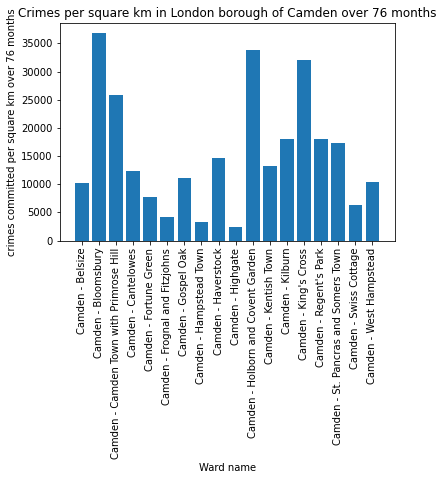

In [ ]:
#total crime count per square kilometre plotted against ward names
plt.bar(df_pop_area['Ward name'], df_pop_area['crimes committed per square kilometre over 7 years'])
plt.xlabel('Ward name')
plt.xticks(rotation=90)
plt.ylabel('crimes committed per square km over 76 months')
plt.title('Crimes per square km in London borough of Camden over 76 months')

## Let's take the cleaned On_Street_Crime_In_Camden.csv (df_crime) and extract all the summed crimes for 2015 by ward to create a bin for crimes per square area for just 2015

In [ ]:
# take df_crime and group all crimes committed in 2015 only, for each of the 18 wards, ignoring all other dates
df_crime_2015 = df_crime[df_crime['Epoch'].str.contains("2015")]
df_crime_2015

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded,Street ID encoded,Street name encoded
2,Theft from the person,965233,On or near Avenue Road,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,07/01/2015 12:00:00 AM,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,05/05/2016,1,11,16,821,97
4,Drugs,972275,On or near Oakeshott Avenue,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,06/01/2015 12:00:00 AM,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,21/08/2015,1,4,9,1437,819
12,Other theft,968149,On or near Petrol Station,Investigation complete; no suspect identified,12/01/2015 12:00:00 AM,Police Force,NaN,45560924,8c71420dfdcee3dc390e78791189d931f72ed677a510f3...,12/01/2015 12:00:00 AM,E05000131,Cantelowes,529541.84,184590.92,-0.133277,51.545363,05/05/2016,1,6,3,1414,874
16,Public order,960515,On or near Parking Area,Investigation complete; no suspect identified,09/01/2015 12:00:00 AM,Police Force,NaN,43283864,29b4b7f0a8e2a31a5be0dafe0003b25d57ab0b41695f92...,08/01/2015 12:00:00 AM,E05000129,Bloomsbury,530100.87,182168.92,-0.126114,51.523469,05/05/2016,1,8,1,122,856
26,Other theft,960590,On or near Further/higher Educational Building,Offender given suspended prison sentence,02/01/2015 12:00:00 AM,Police Force,NaN,39281847,29c4be88f6ab15afe55afc1c51107107007f81464502e6...,02/01/2015 12:00:00 AM,E05000129,Bloomsbury,529589.86,182300.85,-0.133427,51.524772,21/08/2015,1,6,1,195,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210952,Burglary,967635,On or near Daleham Gardens,Under investigation,06/01/2015 12:00:00 AM,Police Force,NaN,41884959,bbf198ab0367450ec9523eeb2f35980230b49eec1e6e19...,06/01/2015 12:00:00 AM,E05000133,Frognal and Fitzjohns,526698.87,184904.96,-0.174140,51.548830,21/08/2015,1,2,5,991,325
210958,Burglary,960931,On or near Orde Hall Street,Under investigation,09/01/2015 12:00:00 AM,Police Force,NaN,43662016,22116aa05568e3974208e60cf214338d9950e5afb4e8fa...,09/01/2015 12:00:00 AM,E05000138,Holborn and Covent Garden,530586.87,181973.86,-0.119185,51.521604,05/05/2016,1,2,10,375,831
210959,Robbery,967707,On or near Keats Grove,Under investigation,02/01/2015 12:00:00 AM,Police Force,NaN,39313357,ebf7c063236dbf844c9c9a3f8824902b76c4d13fa7d749...,02/01/2015 12:00:00 AM,E05000135,Hampstead Town,527070.84,185689.95,-0.168495,51.555801,21/08/2015,1,9,7,1053,620
210966,Anti-social behaviour,961005,On or near Red Lion Square,NaN,NaN,Police Force,NaN,43256211,NaN,08/01/2015 12:00:00 AM,E05000138,Holborn and Covent Garden,530616.86,181684.86,-0.118860,51.519000,05/05/2016,1,0,10,443,928


In [ ]:
# group the crimes committed in 2015 by ward name
total_crimes_2015 = df_crime_2015.groupby(['Ward Name']).sum()      #sum 'count' number of crimes by date
#total_crimes_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude'], axis=1, inplace=True)     #remove all other columns

In [ ]:
total_crimes_2015['Ward'] = total_crimes_2015.index
total_crimes_2015.reset_index(drop=True)                #reset the index from 0 to 17, i.e. an index number for each of the 18 wards

,Street ID,ID,Easting,Northing,Longitude,Latitude,count,Category encoded,Ward encoded,Street ID encoded,Street name encoded,Ward
0,1090273025,47425476153,5.947456e+08,2.082453e+08,-187.478302,58143.995216,1128,7274,0,1097246,583692,Belsize
1,4552253568,196828155097,2.466582e+09,8.475622e+08,-617.827489,239938.100889,4657,29860,4657,1228729,3258622,Bloomsbury
2,4904415378,211515874890,2.648327e+09,9.217700e+08,-728.415135,258166.095762,5009,32877,10018,3256817,3577187,Camden Town with Primrose Hill
3,1326051641,57919153581,7.265209e+08,2.532204e+08,-183.022096,70719.896159,1372,8335,4116,1333109,908415,Cantelowes
4,839034073,36518649487,4.554838e+08,1.608414e+08,-175.404363,44747.851070,868,4763,3472,795514,584253,Fortune Green
5,879668555,38262871781,4.783496e+08,1.683667e+08,-164.239850,46860.569223,909,5592,4545,965962,498771,Frognal and Fitzjohns
6,1120104377,48503885012,6.076545e+08,2.133454e+08,-179.719791,59337.053311,1151,6211,6906,1369987,625949,Gospel Oak
7,1120139518,47959272926,6.001480e+08,2.114702e+08,-194.604405,58721.823415,1139,7837,7973,1338511,818970,Hampstead Town
8,1496327971,65151494589,8.124291e+08,2.839894e+08,-233.864344,79278.022046,1538,9539,12304,1602243,1008324,Haverstock
9,1090244867,46866002910,5.861291e+08,2.066875e+08,-163.410393,57181.825631,1109,7046,9981,1530382,690257,Highgate


In [ ]:
df_pop_area['crimes committed in 2015'] = total_crimes_2015['count'].values
df_pop_area

,Ward name,Population - 2015,Area - Square Kilometres,crimes committed over 7 years,crimes committed per square kilometre over 7 years,crimes committed in 2015
0,Camden - Belsize,12800.0,0.8,8108,10134.0,1128
1,Camden - Bloomsbury,11700.0,1.0,36759,36759.0,4657
2,Camden - Camden Town with Primrose Hill,13100.0,1.2,30958,25798.0,5009
3,Camden - Cantelowes,12450.0,0.8,9895,12368.0,1372
4,Camden - Fortune Green,12100.0,1.0,7758,7758.0,868
5,Camden - Frognal and Fitzjohns,12250.0,1.5,6239,4159.0,909
6,Camden - Gospel Oak,11500.0,0.7,7725,11035.0,1151
7,Camden - Hampstead Town,11400.0,2.5,8297,3318.0,1139
8,Camden - Haverstock,12750.0,0.7,10225,14607.0,1538
9,Camden - Highgate,11150.0,3.2,7952,2484.0,1109


In [ ]:
#create a "bin" of total crimes committed per square kilometre over a 7 year period
df_pop_area['crimes committed per square kilometre in 2015'] = df_pop_area['crimes committed in 2015']//df_pop_area['Area - Square Kilometres']
df_pop_area

,Ward name,Population - 2015,Area - Square Kilometres,crimes committed over 7 years,crimes committed per square kilometre over 7 years,crimes committed in 2015,crimes committed per square kilometre in 2015
0,Camden - Belsize,12800.0,0.8,8108,10134.0,1128,1409.0
1,Camden - Bloomsbury,11700.0,1.0,36759,36759.0,4657,4657.0
2,Camden - Camden Town with Primrose Hill,13100.0,1.2,30958,25798.0,5009,4174.0
3,Camden - Cantelowes,12450.0,0.8,9895,12368.0,1372,1714.0
4,Camden - Fortune Green,12100.0,1.0,7758,7758.0,868,868.0
5,Camden - Frognal and Fitzjohns,12250.0,1.5,6239,4159.0,909,606.0
6,Camden - Gospel Oak,11500.0,0.7,7725,11035.0,1151,1644.0
7,Camden - Hampstead Town,11400.0,2.5,8297,3318.0,1139,455.0
8,Camden - Haverstock,12750.0,0.7,10225,14607.0,1538,2197.0
9,Camden - Highgate,11150.0,3.2,7952,2484.0,1109,346.0


In [ ]:
df_pop_area.rename(columns={'Ward name':'Ward Name'}, inplace=True)

In [ ]:
#drop the name Camden from the beginning of cell values in Ward Name
df_pop_area['Ward Name'] = df_pop_area['Ward Name'].str.lstrip('Camden')

In [ ]:
#drop the '-' symbol from the beginning of cell values in Ward Name
df_pop_area['Ward Name'] = df_pop_area['Ward Name'].str.lstrip(' -')

In [ ]:
# only way to get rid of the (.) in St. Pancras and Somers Town
df_pop_area['Ward Name'] = df_pop_area['Ward Name'].replace('St. Pancras and Somers Town', 'St Pancras and Somers Town')

In [ ]:
df_pop_area

,Ward Name,Population - 2015,Area - Square Kilometres,crimes committed over 7 years,crimes committed per square kilometre over 7 years,crimes committed in 2015,crimes committed per square kilometre in 2015
0,Belsize,12800.0,0.8,8108,10134.0,1128,1409.0
1,Bloomsbury,11700.0,1.0,36759,36759.0,4657,4657.0
2,Camden Town with Primrose Hill,13100.0,1.2,30958,25798.0,5009,4174.0
3,Cantelowes,12450.0,0.8,9895,12368.0,1372,1714.0
4,Fortune Green,12100.0,1.0,7758,7758.0,868,868.0
5,Frognal and Fitzjohns,12250.0,1.5,6239,4159.0,909,606.0
6,Gospel Oak,11500.0,0.7,7725,11035.0,1151,1644.0
7,Hampstead Town,11400.0,2.5,8297,3318.0,1139,455.0
8,Haverstock,12750.0,0.7,10225,14607.0,1538,2197.0
9,Highgate,11150.0,3.2,7952,2484.0,1109,346.0


Text(0.5, 1.0, 'Crimes committed per square km in 2015')

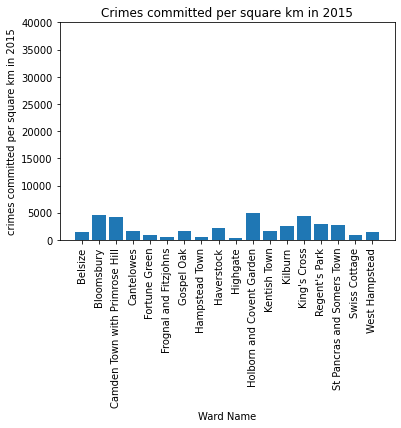

In [ ]:
#total crime count per square kilometre
plt.bar(df_pop_area['Ward Name'], df_pop_area['crimes committed per square kilometre in 2015'], label = 'crimes committed per square kilometre in 2015')
plt.xlabel('Ward Name')
plt.xticks(df_pop_area['Ward Name'])
plt.ylim(0, 40000)
plt.xticks(rotation=90)
plt.ylabel('crimes committed per square km in 2015')
plt.title('Crimes committed per square km in 2015')

# Using "binned" crime counts per square kilometre, KNN classification of crime longitude and latitude

In [ ]:
#create a 'look-up table' to populate the 'crime per square km in 2015' column in df_crime dataframe
df_pop_area_table = df_pop_area[['Ward Name','crimes committed per square kilometre in 2015']]
df_pop_area_table

,Ward Name,crimes committed per square kilometre in 2015
0,Belsize,1409.0
1,Bloomsbury,4657.0
2,Camden Town with Primrose Hill,4174.0
3,Cantelowes,1714.0
4,Fortune Green,868.0
5,Frognal and Fitzjohns,606.0
6,Gospel Oak,1644.0
7,Hampstead Town,455.0
8,Haverstock,2197.0
9,Highgate,346.0


#Now in df_crime, create a new column called crime committed per square km in 2015 and fill it completely with crime committed per square km from the df_pop_area dataframe, where the crime committed per square km assigned for each individual ward.

In [ ]:
df_crime.sort_values(['Ward Name', 'Street ID'], inplace=True)

In [ ]:
df_crime

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded,Street ID encoded,Street name encoded
2435,Robbery,965014,On or near Tobin Close,Under investigation,05/01/2017 12:00:00 AM,Police Force,NaN,57113381,70366f1191438a938834a17d99f9847f37c8775a528e7a...,05/01/2017 12:00:00 AM,E05000128,Belsize,527437.27,184407.67,-0.163639,51.544187,03/11/2017,1,9,0,659,1096
10959,Possession of weapons,965014,On or near Tobin Close,Status update unavailable,02/01/2018 12:00:00 AM,Police Force,NaN,60703007,1cf76966ed0ca8f2498e9962cc430d572556cd1cc2b17c...,10/01/2017 12:00:00 AM,E05000128,Belsize,527437.27,184407.67,-0.163639,51.544187,13/04/2018,1,7,0,659,1096
12118,Theft from the person,965014,On or near Tobin Close,Under investigation,06/01/2017 12:00:00 AM,Police Force,NaN,58077149,8aa143f8a85255cb2189733a751939318293405a8ade70...,06/01/2017 12:00:00 AM,E05000128,Belsize,527437.27,184407.67,-0.163639,51.544187,03/11/2017,1,11,0,659,1096
15487,Burglary,965014,On or near Tobin Close,Investigation complete; no suspect identified,12/01/2016 12:00:00 AM,Police Force,NaN,52906099,47f4ad1c3cdf105bb8d3a9d9ef1c9f3c326089b7739c3c...,11/01/2016 12:00:00 AM,E05000128,Belsize,527439.89,184406.86,-0.163639,51.544187,05/06/2017,1,2,0,659,1096
23306,Burglary,965014,On or near Tobin Close,Under investigation,02/01/2016 12:00:00 AM,Police Force,NaN,47190450,d00e84c4b9ec46628df99401fd3af9dc9c950745bf30e6...,02/01/2016 12:00:00 AM,E05000128,Belsize,527439.89,184406.86,-0.163639,51.544187,05/05/2016,1,2,0,659,1096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277441,Violence and sexual offences,1490647,West Hampstead (station),Status update unavailable,06/01/2020 12:00:00 AM,British Transport Police,Station,89458945,NaN,02/01/2020 12:00:00 AM,E05000145,West Hampstead,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,13,17,1541,1204
277542,Public order,1490647,West Hampstead (station),Status update unavailable,11/01/2020 12:00:00 AM,British Transport Police,Station,89434804,NaN,07/01/2020 12:00:00 AM,E05000145,West Hampstead,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,8,17,1541,1204
277551,Theft from the person,1490647,West Hampstead (station),Status update unavailable,01/01/2020 12:00:00 AM,British Transport Police,Station,89411757,NaN,09/01/2019 12:00:00 AM,E05000145,West Hampstead,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,11,17,1541,1204
278573,Other theft,1490647,West Hampstead (station),Status update unavailable,06/01/2020 12:00:00 AM,British Transport Police,Station,89458946,NaN,02/01/2020 12:00:00 AM,E05000145,West Hampstead,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,6,17,1541,1204


In [ ]:
# join the values in the look-up table to df_crime dataframe
df_pop_area_table.set_index(['Ward Name'], inplace=True)
df_crime.set_index(['Ward Name'], inplace=True)

df_crime = df_crime.join(df_pop_area_table).reset_index()

In [ ]:
df_crime

,Ward Name,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded,Street ID encoded,Street name encoded,crimes committed per square kilometre in 2015
0,Belsize,Robbery,965014,On or near Tobin Close,Under investigation,05/01/2017 12:00:00 AM,Police Force,NaN,57113381,70366f1191438a938834a17d99f9847f37c8775a528e7a...,05/01/2017 12:00:00 AM,E05000128,527437.27,184407.67,-0.163639,51.544187,03/11/2017,1,9,0,659,1096,1409.0
1,Belsize,Possession of weapons,965014,On or near Tobin Close,Status update unavailable,02/01/2018 12:00:00 AM,Police Force,NaN,60703007,1cf76966ed0ca8f2498e9962cc430d572556cd1cc2b17c...,10/01/2017 12:00:00 AM,E05000128,527437.27,184407.67,-0.163639,51.544187,13/04/2018,1,7,0,659,1096,1409.0
2,Belsize,Theft from the person,965014,On or near Tobin Close,Under investigation,06/01/2017 12:00:00 AM,Police Force,NaN,58077149,8aa143f8a85255cb2189733a751939318293405a8ade70...,06/01/2017 12:00:00 AM,E05000128,527437.27,184407.67,-0.163639,51.544187,03/11/2017,1,11,0,659,1096,1409.0
3,Belsize,Burglary,965014,On or near Tobin Close,Investigation complete; no suspect identified,12/01/2016 12:00:00 AM,Police Force,NaN,52906099,47f4ad1c3cdf105bb8d3a9d9ef1c9f3c326089b7739c3c...,11/01/2016 12:00:00 AM,E05000128,527439.89,184406.86,-0.163639,51.544187,05/06/2017,1,2,0,659,1096,1409.0
4,Belsize,Burglary,965014,On or near Tobin Close,Under investigation,02/01/2016 12:00:00 AM,Police Force,NaN,47190450,d00e84c4b9ec46628df99401fd3af9dc9c950745bf30e6...,02/01/2016 12:00:00 AM,E05000128,527439.89,184406.86,-0.163639,51.544187,05/05/2016,1,2,0,659,1096,1409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285102,West Hampstead,Violence and sexual offences,1490647,West Hampstead (station),Status update unavailable,06/01/2020 12:00:00 AM,British Transport Police,Station,89458945,NaN,02/01/2020 12:00:00 AM,E05000145,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,13,17,1541,1204,1487.0
285103,West Hampstead,Public order,1490647,West Hampstead (station),Status update unavailable,11/01/2020 12:00:00 AM,British Transport Police,Station,89434804,NaN,07/01/2020 12:00:00 AM,E05000145,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,8,17,1541,1204,1487.0
285104,West Hampstead,Theft from the person,1490647,West Hampstead (station),Status update unavailable,01/01/2020 12:00:00 AM,British Transport Police,Station,89411757,NaN,09/01/2019 12:00:00 AM,E05000145,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,11,17,1541,1204,1487.0
285105,West Hampstead,Other theft,1490647,West Hampstead (station),Status update unavailable,06/01/2020 12:00:00 AM,British Transport Police,Station,89458946,NaN,02/01/2020 12:00:00 AM,E05000145,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,6,17,1541,1204,1487.0


In [ ]:
df_crime.isnull().any()

Ward Name                                        False
Category                                         False
Street ID                                        False
Street Name                                      False
Outcome Category                                  True
Outcome Date                                      True
Service                                          False
Location Subtype                                  True
ID                                               False
Persistent ID                                     True
Epoch                                            False
Ward Code                                        False
Easting                                          False
Northing                                         False
Longitude                                        False
Latitude                                         False
Last Uploaded                                    False
count                                            False
Category e

#Applying KNN classification on longitude and latitude values (X) against crimes committed per square km in 2015 (y)

In [ ]:
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y
  
  def predict(self, X,K, epsilon =1e-3):
    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
    return y_hat


In [ ]:
def accuracy(y, y_hat):
  return np.mean(y == y_hat)

In [ ]:
knn = KNNClassifier()

In [ ]:
X=np.zeros((len(df_crime),2)) #create a numpy array with the number of rows of the df_crime set and 2 columns
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# fill the X numpy array with the longitude and latitude columns from the houses_cleaned datasets
X[:,0]=df_crime.iloc[:,14] #longitude
X[:,1]=df_crime.iloc[:,15] #latitude
X

array([[-0.163639, 51.544187],
       [-0.163639, 51.544187],
       [-0.163639, 51.544187],
       ...,
       [-0.191067, 51.547528],
       [-0.191067, 51.547528],
       [-0.191067, 51.547528]])

In [ ]:
len(X)

285107

In [ ]:
y =np.zeros((len(df_crime),1)) #create a numpy array with the number of rows of the df_crime set and 2 columns
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
y = df_crime.iloc[:,22]

In [ ]:
y

0         1409.0
1         1409.0
2         1409.0
3         1409.0
4         1409.0
           ...  
285102    1487.0
285103    1487.0
285104    1487.0
285105    1487.0
285106    1487.0
Name: crimes committed per square kilometre in 2015, Length: 285107, dtype: float64

In [ ]:
knn.fit(X,y)

In [ ]:
# predict 
y_hat = knn.predict(X,20)
y_hat

array([1409., 1409., 1409., ..., 1487., 1487., 1487.])

In [ ]:
accuracy(y, y_hat)

0.9902878568397128

In [ ]:
#save the knn model
import pickle
knnPickle = open('knnpickle_file', 'wb')
pickle.dump(knn, knnPickle)

In [ ]:
#load the knn model
knn_from_pickle = pickle.load(open('knnpickle_file', 'rb'))

In [ ]:
#Use the loaded pickled model to make predictions
X_test = [[-0.127858, 51.51951]]
print('crime count per square km =', knn_from_pickle.predict(X_test,20))

crime count per square km = [4657.]


# Applying Gauss Bayes to the same X and y sets, taking the assumption that the probability distribution of crimes per square km in 2015 in each of the 18 wards is Normally distributed. 

In [ ]:
class GaussBayes():

  def fit(self, X, y, epsilon =1e-3):
    self.likelihoods =dict()
    self.priors = dict()

    self.K = y.astype(int)

    for k in self.K:
      X_k = X[y==k,:]
      print(X_k)
      N_k, D = X_k.shape
      #print(X_k.shape)
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] ={"mean":X_k.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
      #print(self.likelihoods[k])
      self.priors[k] = len(X_k)/len(X)


  def predict(self, X):
    N, D = X.shape

    P_hat = np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [ ]:
gbayes = GaussBayes()

In [ ]:
gbayes.fit(X,y)

Streaming output truncated to the last 5000 lines.
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.545847]
 [-0.190557 51.545847]
 ...
 [-0.191067 51.547528]
 [-0.191067 51.547528]
 [-0.191067 51.547528]]
[[-0.190557 51.545847]
 [-0.190557 51.

#Let's look at the ward-atlas-2014boundaries.csv

In [ ]:
df_ward_atlas.shape

(629, 946)

In [ ]:
df_ward_atlas.describe()

,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,Population and Age; Population Estimates and Projections; 2016,Population and Age; Population Estimates and Projections; 2018,Population and Age; Population Estimates and Projections; 2023,Population and Age; Population Estimates and Projections; 2028,Population and Age; Aged 0-15; 2002,Population and Age; Aged 0-15; 2004,Population and Age; Aged 0-15; 2006,Population and Age; Aged 0-15; 2008,Population and Age; Aged 0-15; 2010,Population and Age; Aged 0-15; 2011,Population and Age; Aged 0-15; 2012,Population and Age; Aged 0-15; 2013,Population and Age; Aged 16-64; 2002,Population and Age; Aged 16-64; 2004,Population and Age; Aged 16-64; 2006,Population and Age; Aged 16-64; 2008,Population and Age; Aged 16-64; 2010,Population and Age; Aged 16-64; 2011,Population and Age; Aged 16-64; 2012,Population and Age; Aged 16-64; 2013,Population and Age; Aged 65+; 2002,Population and Age; Aged 65+; 2004,Population and Age; Aged 65+; 2006,Population and Age; Aged 65+; 2008,Population and Age; Aged 65+; 2010,Population and Age; Aged 65+; 2011,Population and Age; Aged 65+; 2012,Population and Age; Aged 65+; 2013,Population and Age; All ages; 2002,Population and Age; All ages; 2004,Population and Age; All ages; 2006,Population and Age; All ages; 2008,Population and Age; All ages; 2010,Population and Age; All ages; 2011,...,Indices of Deprivation; Rank of IDACI (within London); 2010,Indices of Deprivation; IDAOPI; 2007,Indices of Deprivation; IDAOPI; 2010,Indices of Deprivation; Rank of IDAOPI (within London); 2007,Indices of Deprivation; Rank of IDAOPI (within London); 2010,Indices of Deprivation; Number of SOAs in ward; 2007,Indices of Deprivation; Number of SOAs in ward; 2010,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2010,Workplace employment; Total employment; 2009,Workplace employment; Total employment; 2010,Workplace employment; Total employment; 2011,Workplace employment; Total employment; 2012,Workplace employment; Total employment; 2013,Workplace employment; Total employees; 2009,Workplace employment; Total employees; 2010,Workplace employment; Total employees; 2011,Workplace employment; Total employees; 2012,Workplace employment; Total employees; 2013,Workplace employment; Number of Full-time employees; 2009,Workplace employment; Number of Full-time employees; 2010,Workplace employment; Number of Full-time employees; 2011,Workplace employment; Number of Full-time employees; 2012,Workplace employment; Number of Full-time employees; 2013,Workplace employment; Number of Part-time employees; 2009,Workplace employment; Number of Part-time employees; 2010,Workplace employment; Number of Part-time employees; 2011,Workplace employment; Number of Part-time employees; 2012,Workplace employment; Number of Part-time employees; 2013,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 2008,Election turnout; Turnout Mayoral election; 2012
count,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290000e+02,6.290

In [ ]:
df_ward_atlas

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,Population and Age; Population Estimates and Projections; 2016,Population and Age; Population Estimates and Projections; 2018,Population and Age; Population Estimates and Projections; 2023,Population and Age; Population Estimates and Projections; 2028,Population and Age; Age structure (percentage) - 2013; Aged 0-15,Population and Age; Age structure (percentage) - 2013; Aged 16-64,Population and Age; Age structure (percentage) - 2013; Aged 65+,Population and Age; Aged 0-15; 2002,Population and Age; Aged 0-15; 2004,Population and Age; Aged 0-15; 2006,Population and Age; Aged 0-15; 2008,Population and Age; Aged 0-15; 2010,Population and Age; Aged 0-15; 2011,Population and Age; Aged 0-15; 2012,Population and Age; Aged 0-15; 2013,Population and Age; Aged 16-64; 2002,Population and Age; Aged 16-64; 2004,Population and Age; Aged 16-64; 2006,Population and Age; Aged 16-64; 2008,Population and Age; Aged 16-64; 2010,Population and Age; Aged 16-64; 2011,Population and Age; Aged 16-64; 2012,Population and Age; Aged 16-64; 2013,Population and Age; Aged 65+; 2002,Population and Age; Aged 65+; 2004,Population and Age; Aged 65+; 2006,Population and Age; Aged 65+; 2008,Population and Age; Aged 65+; 2010,Population and Age; Aged 65+; 2011,Population and Age; Aged 65+; 2012,...,Indices of Deprivation; Number of SOAs in ward; 2007,Indices of Deprivation; Number of SOAs in ward; 2010,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2010,Workplace employment; Total employment; 2009,Workplace employment; Total employment; 2010,Workplace employment; Total employment; 2011,Workplace employment; Total employment; 2012,Workplace employment; Total employment; 2013,Workplace employment; Total employees; 2009,Workplace employment; Total employees; 2010,Workplace employment; Total employees; 2011,Workplace employment; Total employees; 2012,Workplace employment; Total employees; 2013,Workplace employment; Number of Full-time employees; 2009,Workplace employment; Number of Full-time employees; 2010,Workplace employment; Number of Full-time employees; 2011,Workplace employment; Number of Full-time employees; 2012,Workplace employment; Number of Full-time employees; 2013,Workplace employment; Number of Part-time employees; 2009,Workplace employment; Number of Part-time employees; 2010,Workplace employment; Number of Part-time employees; 2011,Workplace employment; Number of Part-time employees; 2012,Workplace employment; Number of Part-time employees; 2013,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2007/2008,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2008/2009,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2009/2010,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 20

In [ ]:
#extract the 18 wards from the London borough of Camden from df_ward_atlas dataframe
df_ward_camden = df_ward_atlas[df_ward_atlas['Unnamed: 2'] == 'Camden']
df_ward_camden.shape

(18, 946)

In [ ]:
df_ward_camden

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,Population and Age; Population Estimates and Projections; 2016,Population and Age; Population Estimates and Projections; 2018,Population and Age; Population Estimates and Projections; 2023,Population and Age; Population Estimates and Projections; 2028,Population and Age; Age structure (percentage) - 2013; Aged 0-15,Population and Age; Age structure (percentage) - 2013; Aged 16-64,Population and Age; Age structure (percentage) - 2013; Aged 65+,Population and Age; Aged 0-15; 2002,Population and Age; Aged 0-15; 2004,Population and Age; Aged 0-15; 2006,Population and Age; Aged 0-15; 2008,Population and Age; Aged 0-15; 2010,Population and Age; Aged 0-15; 2011,Population and Age; Aged 0-15; 2012,Population and Age; Aged 0-15; 2013,Population and Age; Aged 16-64; 2002,Population and Age; Aged 16-64; 2004,Population and Age; Aged 16-64; 2006,Population and Age; Aged 16-64; 2008,Population and Age; Aged 16-64; 2010,Population and Age; Aged 16-64; 2011,Population and Age; Aged 16-64; 2012,Population and Age; Aged 16-64; 2013,Population and Age; Aged 65+; 2002,Population and Age; Aged 65+; 2004,Population and Age; Aged 65+; 2006,Population and Age; Aged 65+; 2008,Population and Age; Aged 65+; 2010,Population and Age; Aged 65+; 2011,Population and Age; Aged 65+; 2012,...,Indices of Deprivation; Number of SOAs in ward; 2007,Indices of Deprivation; Number of SOAs in ward; 2010,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 5% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 10% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 20% nationally; 2010,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2007,Indices of Deprivation; % of LSOAs in worst 50% nationally; 2010,Workplace employment; Total employment; 2009,Workplace employment; Total employment; 2010,Workplace employment; Total employment; 2011,Workplace employment; Total employment; 2012,Workplace employment; Total employment; 2013,Workplace employment; Total employees; 2009,Workplace employment; Total employees; 2010,Workplace employment; Total employees; 2011,Workplace employment; Total employees; 2012,Workplace employment; Total employees; 2013,Workplace employment; Number of Full-time employees; 2009,Workplace employment; Number of Full-time employees; 2010,Workplace employment; Number of Full-time employees; 2011,Workplace employment; Number of Full-time employees; 2012,Workplace employment; Number of Full-time employees; 2013,Workplace employment; Number of Part-time employees; 2009,Workplace employment; Number of Part-time employees; 2010,Workplace employment; Number of Part-time employees; 2011,Workplace employment; Number of Part-time employees; 2012,Workplace employment; Number of Part-time employees; 2013,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2007/2008,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2008/2009,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2009/2010,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 20

In [ ]:
df_ward_camden.to_csv('df_ward_atlas_camden.csv', index=False)